In [2]:
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
from collections import Counter

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# 加载数据集
df = pd.read_csv('/data/lab/SAS_Proj/OlistData/olist_order_reviews_dataset.csv')

# 清洗数据
df.drop_duplicates(inplace=True)
df.dropna(subset=['review_comment_message'], inplace=True)

# 分析情感
df['sentiment'] = df['review_comment_message'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_type'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# 加载西班牙语停用词
spanish_stopwords = stopwords.words('spanish')

# 分词并移除停用词
df['tokens'] = df['review_comment_message'].apply(lambda x: [word for word in x.lower().split() if word not in spanish_stopwords])

# 统计词频
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)

# 获取前50个最常见的词
top_50_words = word_freq.most_common(50)

# 使用所有的词生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 显示词云
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
df.head()

In [ ]:
top_50_show = pd.DataFrame(top_50_words)

top_50_show

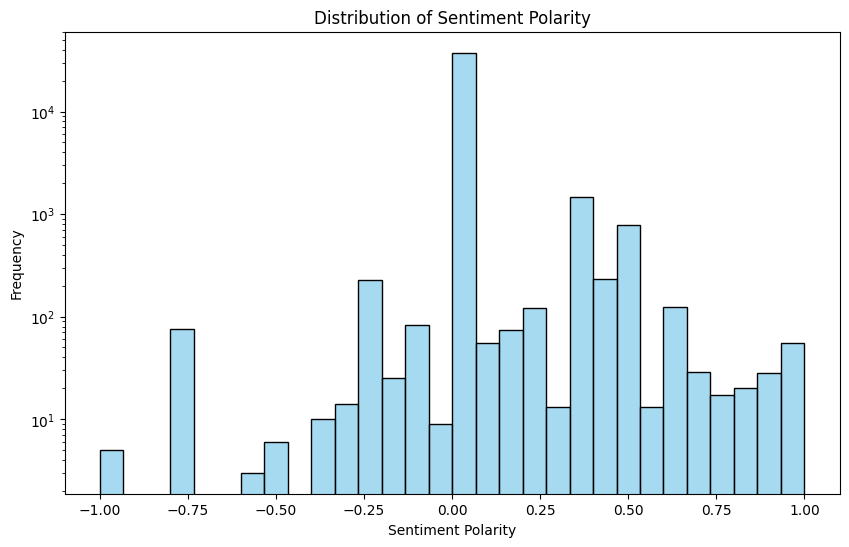

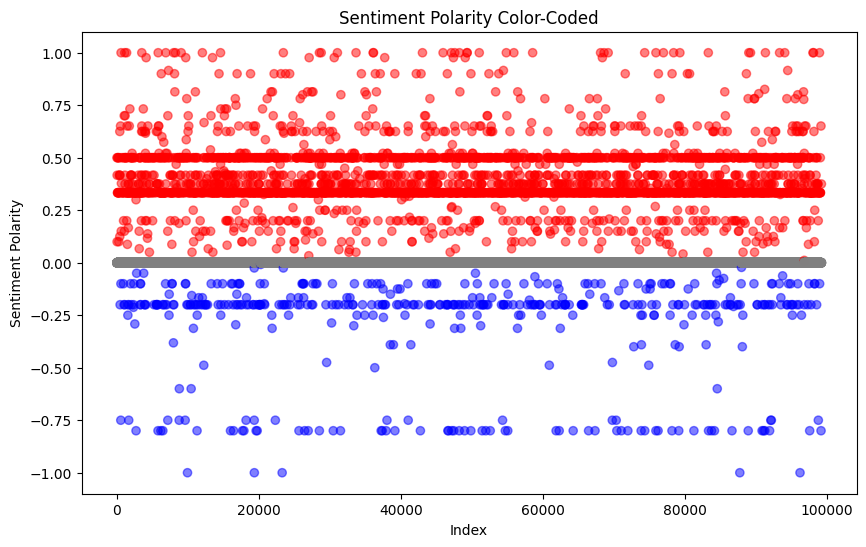

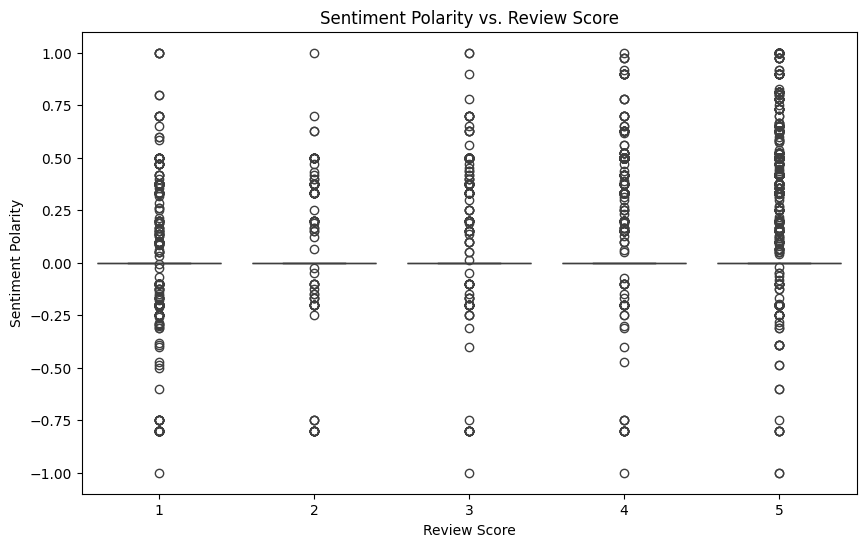

Correlation between Sentiment Polarity and Review Score: 0.12911999610666886


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 确保 'sentiment' 和 'review_score' 列存在
if 'sentiment' in df.columns and 'review_score' in df.columns:
    # 使用Seaborn绘制情感极性的可视化
    plt.figure(figsize=(10, 6))
    sns.histplot(df['sentiment'], bins=30, kde=False, color="skyblue")
    plt.title('Distribution of Sentiment Polarity')
    plt.yscale('log')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

    # 使用不同的颜色标记积极和消极情感
    plt.figure(figsize=(10, 6))
    colors = df['sentiment_type'].map({'positive': 'red', 'negative': 'blue', 'neutral': 'grey'})
    plt.scatter(df.index, df['sentiment'], c=colors, alpha=0.5)
    plt.title('Sentiment Polarity Color-Coded')
    plt.xlabel('Index')
    plt.ylabel('Sentiment Polarity')
    plt.show()

    # 分析评论情感和评分之间的相关性
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='review_score', y='sentiment', data=df)
    plt.title('Sentiment Polarity vs. Review Score')
    plt.xlabel('Review Score')
    plt.ylabel('Sentiment Polarity')
    plt.show()

    # 计算情感极性和评分的相关系数
    correlation = df['sentiment'].corr(df['review_score'])
    print("Correlation between Sentiment Polarity and Review Score:", correlation)
else:
    print("Ensure 'sentiment' and 'review_score' columns are in your DataFrame")
